In [1]:
import pandas as pd

In [2]:
fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Feature Data와 Target Data를 Numpy Array로 변경

In [3]:
import numpy as np

### 연습

In [11]:
# numpy의 column stack과 row stack
testA = np.array([1,2,3,4])
testB = np.array([10, 20, 30, 40])

# 2개의 Array를 묶어서 컬럼 기반의 array로 만들기
combineA = [[i,j] for i,j in zip(testA, testB)]
print(np.array(combineA))
print("-" * 20)

# numpy에서 컬럼 기반
print(np.column_stack((testA, testB)))
print("-" * 20)

# numpy에서 index 기반
print(np.row_stack((testA, testB)))

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]
--------------------
[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]
--------------------
[[ 1  2  3  4]
 [10 20 30 40]]


----

In [14]:
# Fruits의 Feature
fruits_data = np.column_stack((fruits.length, fruits.weight))
fruits_data[:5, :]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [15]:
fruits_data.shape

(49, 2)

In [17]:
# Target
fruits_target = np.array(fruits.name)
fruits_target[:5]

array(['apple', 'apple', 'apple', 'apple', 'apple'], dtype=object)

In [18]:
from sklearn.model_selection import train_test_split

In [ ]:
# Machine Learning을 위한 train과 test 분리
train_input, test_input, train_target, test_target = \
                                            train_test_split(
                                                fruits_data,
                                                fruits_target,
                                                random_state=42, ####
                                                stratify=fruits_target ####
                                            )

In [20]:
# kNN을 이용한 예측
from sklearn.neighbors import KNeighborsClassifier

In [21]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

### 수상한 과일

In [22]:
# length가 25cm이고 weight가 150g인 과일은?
kn.predict([[25, 150]])

array(['berry'], dtype=object)

In [23]:
import matplotlib.pyplot as plt

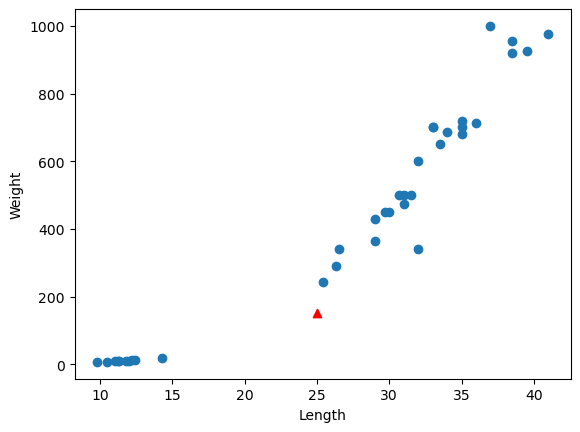

In [25]:
plt.scatter(
    train_input[:,0],
    train_input[:,1]
)

plt.scatter(
    25,
    150,
    marker='^',
    c='red'
)

plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

### 이웃을 출력해보자

In [27]:
distance, indexes = kn.kneighbors([[25, 150]])
print(indexes)

[[11 20 13 22 15]]


In [28]:
# 이웃 index에 해당하는 Feature 출력해보기
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 12.2,  12.2],
        [ 26.3, 290. ]]])

In [29]:
train_target[indexes]

array([['apple', 'berry', 'berry', 'berry', 'apple']], dtype=object)

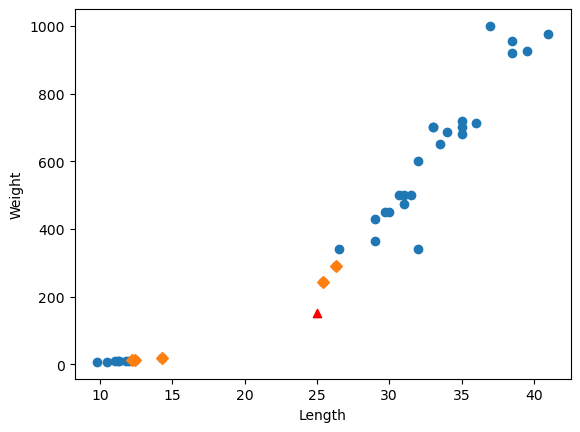

In [30]:
plt.scatter(
    train_input[:,0],
    train_input[:,1]
)

plt.scatter(
    25,
    150,
    marker='^',
    c='red'
)

plt.scatter(
    train_input[indexes, 0],
    train_input[indexes, 1],
    marker='D'
)


plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

---
### 기준을 맞추자

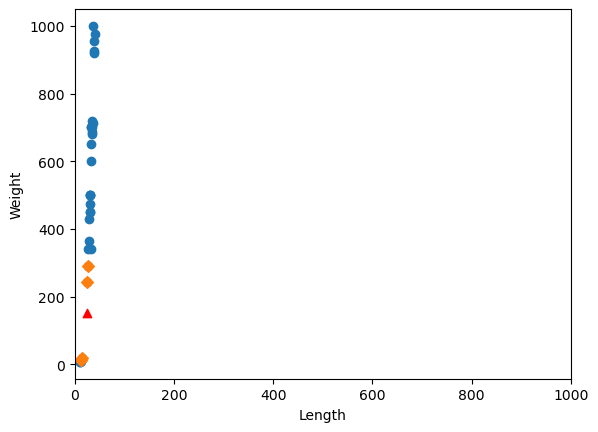

In [31]:
plt.scatter(
    train_input[:,0],
    train_input[:,1]
)

plt.scatter(
    25,
    150,
    marker='^',
    c='red'
)

plt.scatter(
    train_input[indexes, 0],
    train_input[indexes, 1],
    marker='D'
)

plt.xlim(0, 1000)
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

> sample이 Length에는 거의 영향을 받지 않고 weight에서 영향을 많이 받는다. 

### train_data를 표준점수(z점수) 변경 

In [34]:
# length와 weight의 평균
mean = np.mean(train_input, axis=0)
mean

array([ 26.93333333, 441.98333333])

In [36]:
std = np.std(train_input, axis=0)
std

array([ 10.09141549, 325.61300692])

#### 표준점수 = (Feature - 평균) / 표준편차 

In [ ]:
train_scaled = (train_input - mean) / std 
train_scaled[:5,:]

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

### sklearn을 이용

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
# Method 1
scaler.fit(train_input)

StandardScaler()

In [43]:
train_scaled2 = scaler.transform(train_input)
train_scaled2[:5]

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

In [44]:
# Method 2
train_scaled3 = scaler.fit_transform(train_input)
train_scaled3[:5]

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

### 전처리 데이터로 모델 훈련하기

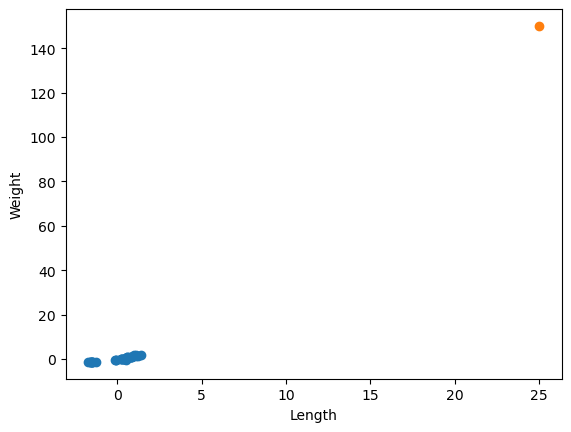

In [45]:
plt.scatter(
    train_scaled3[:,0],
    train_scaled3[:,1]
)

plt.scatter(
    25,
    150
)

plt.xlabel("Length")
plt.ylabel("Weight")

plt.show()

In [46]:
# 예측할 데이터도 표준화 시킨다.
new =([25, 150] - mean) / std
new

array([-0.19158198, -0.89671889])

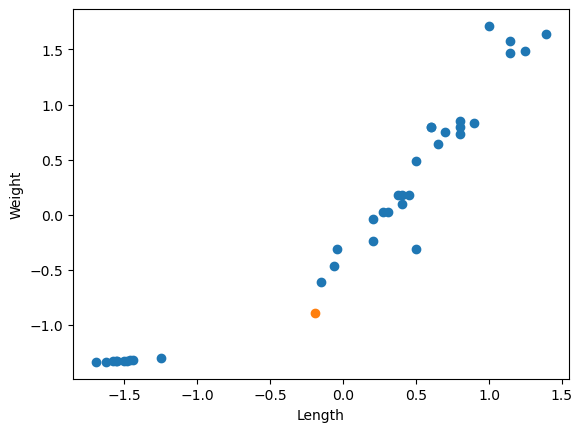

In [47]:
plt.scatter(
    train_scaled3[:,0],
    train_scaled3[:,1]
)

plt.scatter(
    new[0],
    new[1]
)

plt.xlabel("Length")
plt.ylabel("Weight")

plt.show()

# KNN

In [48]:
kn.fit(train_scaled3, train_target)

KNeighborsClassifier()

In [49]:
test_scaled = (test_input - mean) / std # train으로 제작된 평균과 표준편차 사용 

In [50]:
kn.score(test_scaled, test_target)

1.0

In [51]:
kn.predict([new])

array(['apple'], dtype=object)

In [52]:
# 이웃 찾기 
distance, indexes = kn.kneighbors([new])

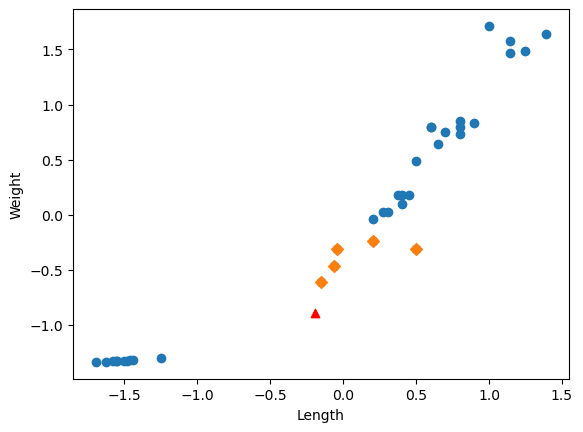

In [53]:
plt.scatter(
    train_scaled3[:,0],
    train_scaled3[:,1]
)

plt.scatter(
    new[0],
    new[1],
    marker="^",
    c="red"
)

plt.scatter(
    train_scaled3[indexes, 0],
    train_scaled3[indexes, 1],
    marker='D'
)


plt.xlabel("Length")
plt.ylabel("Weight")

plt.show()